<a href="https://colab.research.google.com/github/wandalistathea/customer-segmentation/blob/main/Customer%20Segmentation%20(Clustering%20Menggunakan%20K-Means%20%26%20Agglomerative).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import os
data = pd.read_csv("D:/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:

# Gantilah 'nama_file.csv' dengan path atau URL dataset Anda
dataset = pd.read_csv("D:/Mall_Customers.csv")

# Hanya akan menggunakan 2 features agar dapat divisualisasikan
# "Annual Income" dan "Spending Score"
X = dataset.iloc[:, 3:5]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
# Ukuran data (kolom, baris)
X.shape

(200, 2)

In [9]:
# Cek data missing
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Ringkasan data
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


## AGGLOMERATIVE CLUSTERING

In [11]:
import scipy.cluster.hierarchy as sch

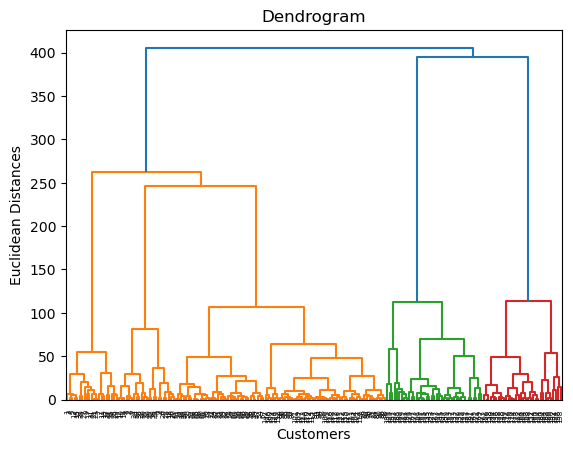

In [12]:
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# Memotongnya di garis vertikal yang paling panjang
# Dia tidak berpotongan dengan garis horizontal manapun
# Di horizontalnya, yang memotong paling banyak titik

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")

In [15]:
ac.fit(X)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [16]:
ac.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [17]:
# Cara lain untuk melihat hasil cluster
# y_pred = ac.fit_predict(X)

In [18]:
hasil_ac = X.copy()
hasil_ac["cluster"] = ac.labels_

In [19]:
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### Visualisasi Hasil Clustering (Agglomerative)

In [20]:
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values

sns.barplot(cluster_x1, cluster_y1)
plt.title("Frekuensi Data pada Masing-Masing Cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given